In [1]:
import os
from os import path

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.rcParams['figure.dpi']= 250
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

import numpy as np

In [2]:
def imshow(img, title = ''):
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

ROOT_DIR = path.abspath('..')

config_file = "../configs/timeline/e2e_mask_rcnn_X_101_32x8d_FPN_real_ort_cls_512.yaml"
weight_file = '../models/e2e_mask_rcnn_X_101_32x8d_FPN_save_512/model_final.pth'

# update the config options with the config file
cfg.merge_from_file(config_file)
cfg.merge_from_list(["TEST.IMS_PER_BATCH", "1", "MODEL.WEIGHT", weight_file])


In [4]:
coco_demo = COCODemo(
    cfg,
    min_image_size=cfg.INPUT.MIN_SIZE_TEST,
    confidence_threshold=0.9,
)

Resnet layer1 in_channels 64 out_channels 256
Resnet layer2 in_channels 256 out_channels 512
Resnet layer3 in_channels 512 out_channels 1024
Resnet layer4 in_channels 1024 out_channels 2048
FPN in_channels_list [256, 512, 1024, 2048]
FPN out_channels 256


loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


/home/zhutian/.conda/envs/torch/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


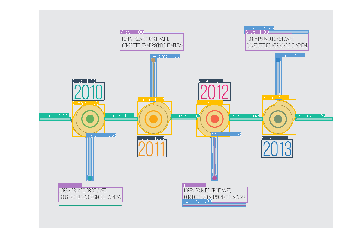

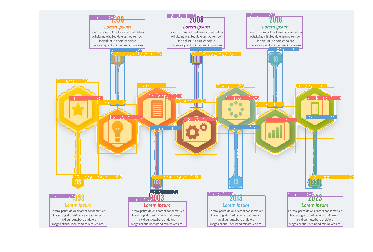

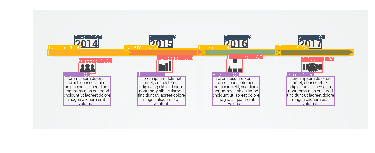

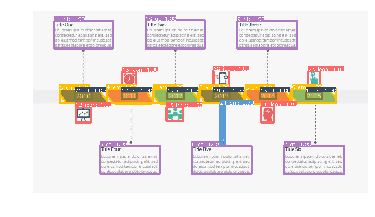

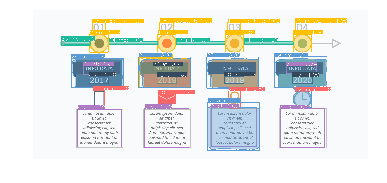

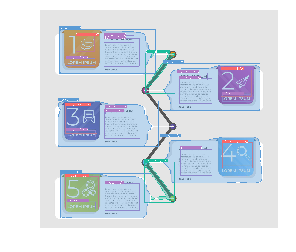

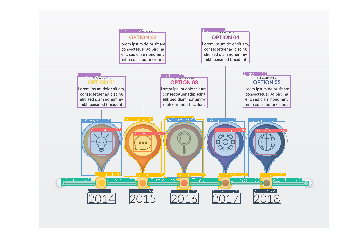

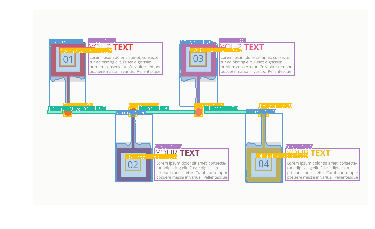

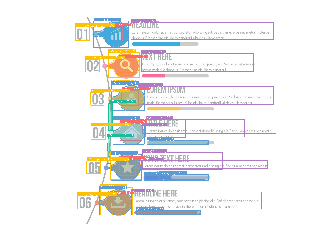

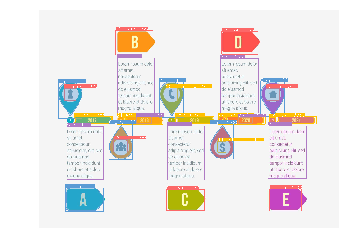

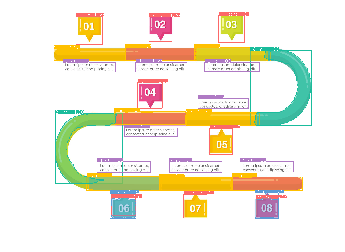

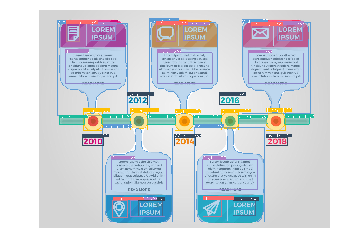

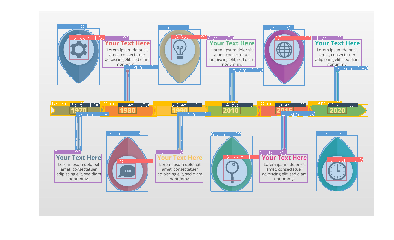

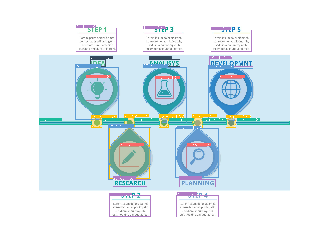

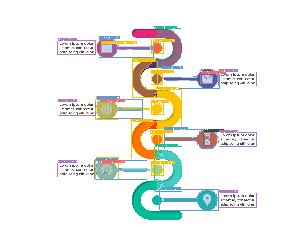

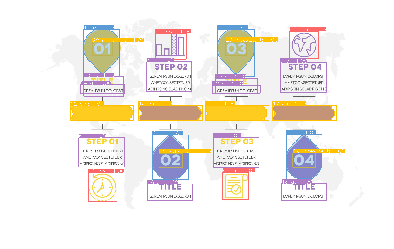

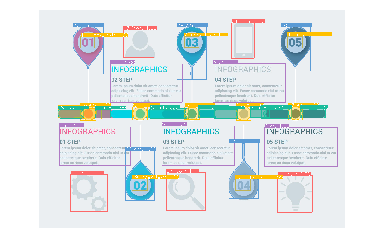

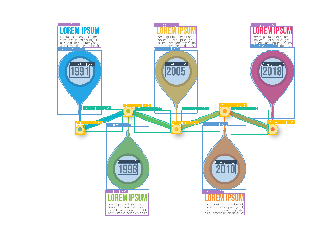

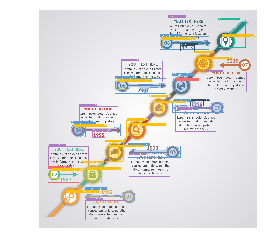

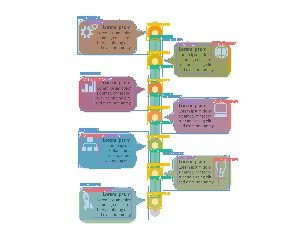

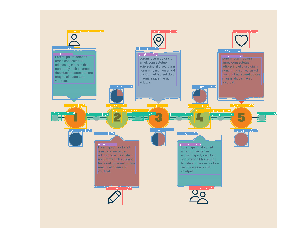

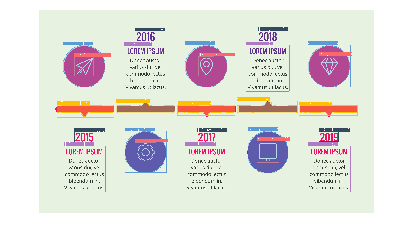

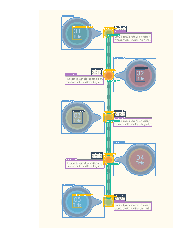

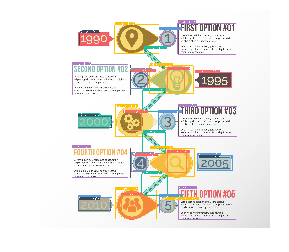

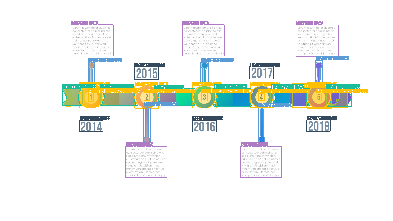

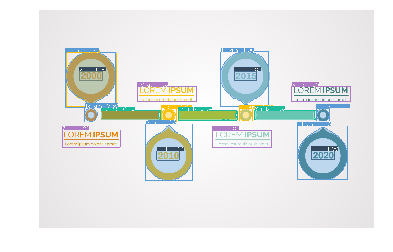

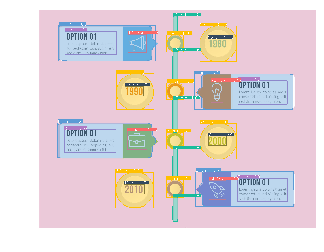

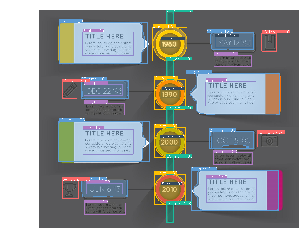

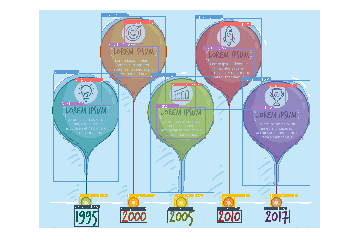

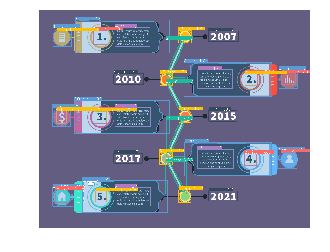

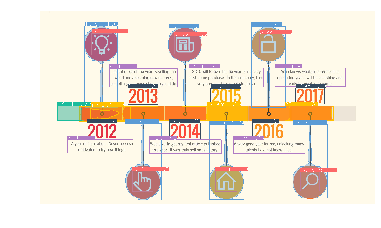

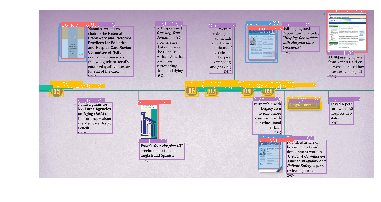

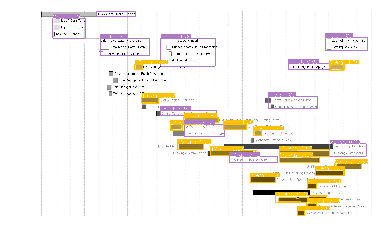

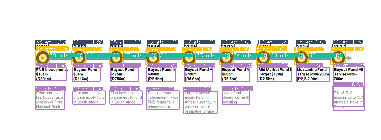

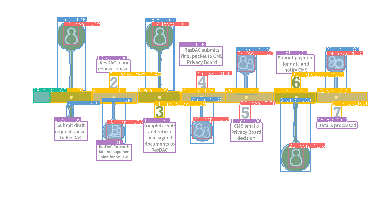

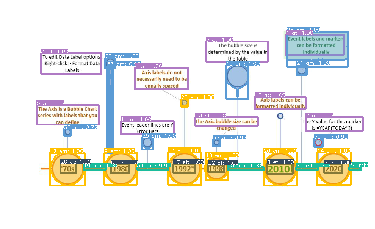

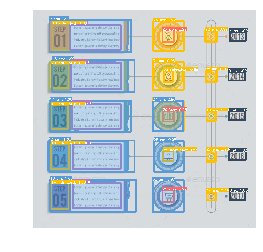

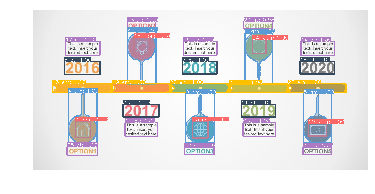

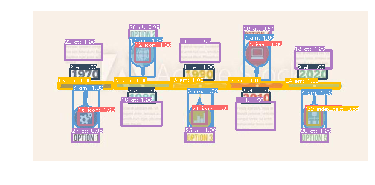

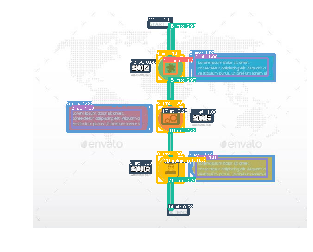

In [5]:
VAL_DATA_DIR = path.join(ROOT_DIR, 'datasets/coco/timeline/val')
ANN_FILE = path.join(ROOT_DIR, 'datasets/coco/timeline/val/coco_format.json')
gtDataset = coco.COCODataset(ANN_FILE, VAL_DATA_DIR, True)

coco_demo.confidence_threshold = 0.7
for image, target, idx in gtDataset:
    image = np.array(image)
    
    # compute & visualize predictions
    top_prediction = coco_demo.compute_prediction(image)
    top_prediction = coco_demo.select_top_predictions(top_prediction)
    
    imshow(tlTool.draw_on_image(image, top_prediction))
